# SPRINT 1: Data Preprocessing & Cleaning

## Step 1: Library Imports and Data Loading

**Objective:** In this initial step, we load the required libraries and the Heart Disease UCI dataset into a pandas DataFrame. We will also perform a preliminary inspection to understand its structure, assign the correct column names, and identify any immediate issues like missing values.

- **Libraries:**
    - `pandas`: For data manipulation and analysis.
    - `numpy`: For numerical operations.

In [1]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np

# --- 2. Define Constants ---
# Define column names as per the dataset documentation
COLUMN_NAMES = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
    'ca', 'thal', 'target'
]

# The notebook is in 'notebooks/', so we go one level up ('../') to find the 'data/' folder.
FILE_PATH = '../data/heart_disease.csv'

# --- 3. Load the Dataset ---
# Load the data, specifying that there is no header row, assigning our custom names,
# and telling pandas to recognize '?' as a missing value (NaN).
df = pd.read_csv(FILE_PATH, header=None, names=COLUMN_NAMES, na_values='?')


# --- 4. Initial Inspection ---
# Display the concise summary of the DataFrame.
# This is crucial to check for data types and non-null values.
print("--- DataFrame Info ---")
df.info()

# Display the first 5 rows to get a feel for the data.
print("\n--- First 5 Rows of the DataFrame ---")
df.head()

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

--- First 5 Rows of the DataFrame ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Step 2: Analyzing and Handling Missing Values

**Observation:** From the `df.info()` output, we identified that the `ca` (number of major vessels) and `thal` (thalassemia) columns contain null values.

**Strategy:** Before we can proceed with analysis and modeling, we must handle these missing values. A common and robust strategy for categorical or discrete data is to replace the missing entries with the **mode** (the most frequently occurring value) of that column. This prevents data loss while maintaining the statistical distribution of the feature.

We will perform the following actions:
1.  Calculate the exact number of missing values to confirm our observation.
2.  Impute (fill) the missing values in `ca` and `thal` with their respective modes.
3.  Verify that the dataset has no more missing values.

In [2]:
# --- 1. Calculate the number of missing values before handling ---
print("--- Missing Values Before Imputation ---")
print(df.isnull().sum())


# --- 2. Impute missing values with the mode (The Modern Way) ---

# Impute 'ca' column by re-assigning the result
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

# Impute 'thal' column by re-assigning the result
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])


# --- 3. Verify that there are no more missing values ---
print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())

--- Missing Values Before Imputation ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

--- Missing Values After Imputation ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Step 3: Data Type Verification and Target Variable Transformation

**Observation:** Looking at the `df.info()` output, many of our feature columns are `float64`, even though they represent discrete integer values. While this is acceptable for most models, the most critical column to inspect is our **target variable**. The original dataset documentation states that `target` ranges from 0 (no disease) to 4 (severe disease).

**Strategy:** For our primary goal of building a classification model to predict the *presence* or *absence* of heart disease, it's standard practice to convert this into a **binary classification problem**. This simplifies the model's task and provides clearer evaluation metrics.

We will transform the `target` column:
1.  Values equal to **0** will remain **0** (representing "Absence of Heart Disease").
2.  Values greater than **0** (i.e., 1, 2, 3, 4) will be converted to **1** (representing "Presence of Heart Disease").

In [3]:
# --- 1. Verify the current distribution of the target variable ---
print("--- Target Variable Value Counts (Before Transformation) ---")
print(df['target'].value_counts())


# --- 2. Binarize the target variable ---
# We use the .apply() method with a lambda function.
# For each value x in the column, if x > 0, it becomes 1, otherwise it remains 0.
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


# --- 3. Verify the new distribution of the target variable ---
print("\n--- Target Variable Value Counts (After Transformation) ---")
print(df['target'].value_counts())

# --- 4. Check the final data types ---
print("\n--- Final Data Types ---")
print(df.dtypes)

--- Target Variable Value Counts (Before Transformation) ---
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

--- Target Variable Value Counts (After Transformation) ---
target
0    164
1    139
Name: count, dtype: int64

--- Final Data Types ---
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


# SPRINT 2: Exploratory Data Analysis (EDA)

## Step 4: Visualizing Key Features

**Objective:** Now that our data is clean and prepared, we will perform Exploratory Data Analysis (EDA). The goal is to visually uncover patterns, identify relationships between variables, and gain deep insights into the dataset. This step is critical for developing intuition about the data before proceeding to feature selection and modeling.

**Tools:** We will use `matplotlib` and `seaborn`, the primary Python libraries for data visualization.

First, let's analyze the distribution of our target variable and then explore the relationship between gender and heart disease.

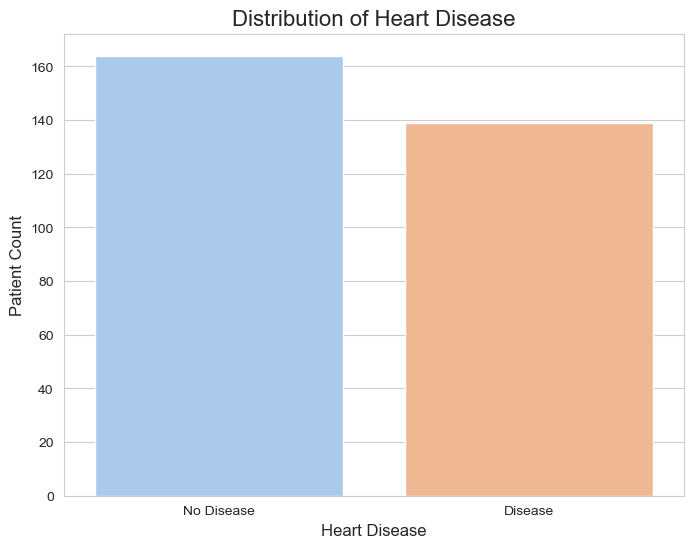

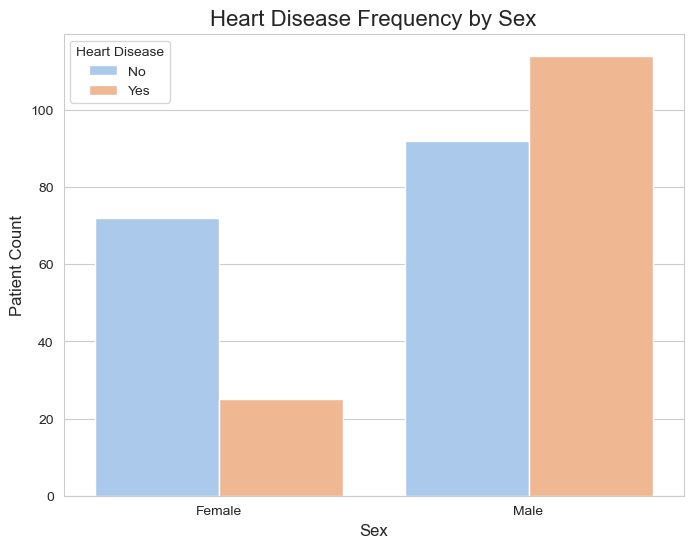

In [4]:
# --- 1. Import Visualization Libraries ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional plot style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')


# --- 2. Visualize the Target Variable Distribution ---
plt.figure(figsize=(8, 6))
# The updated, professional way to plot, which removes the warning
sns.countplot(x='target', data=df, hue='target', palette='pastel', legend=False)
plt.title('Distribution of Heart Disease', fontsize=16)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.savefig('../results/target_distribution.png')
plt.show()


# --- 3. Visualize Heart Disease Frequency by Sex ---
# This plot already uses 'hue', so it follows the best practice. No change needed.
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, hue='target', palette='pastel')
plt.title('Heart Disease Frequency by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.savefig('../results/disease_frequency_by_sex.png')
plt.show()

### Analyzing Key Categorical Features vs. Target

Let's continue our investigation by exploring the relationship between other key categorical features and the presence of heart disease. A deeper understanding of these relationships can provide strong hints for which features will be most important for our model.

- **`cp` (Chest Pain Type):**
    - Value 1: Typical Angina
    - Value 2: Atypical Angina
    - Value 3: Non-anginal Pain
    - Value 4: Asymptomatic
- **`fbs` (Fasting Blood Sugar > 120 mg/dl):**
    - Value 1: True
    - Value 0: False

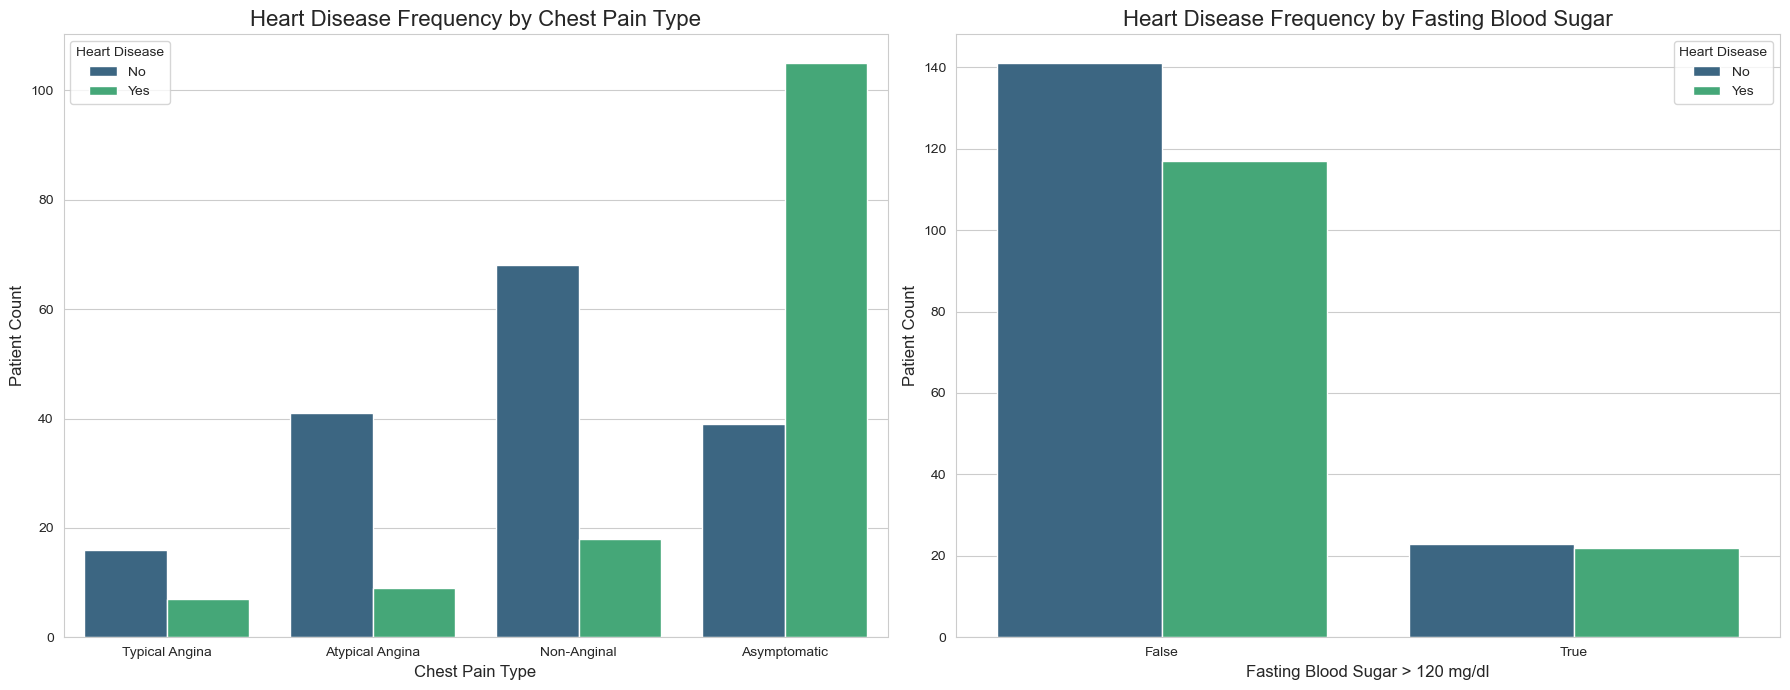

In [5]:
# --- Create a figure with two subplots side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- 1. Visualize Heart Disease Frequency by Chest Pain Type ---
sns.countplot(x='cp', data=df, hue='target', ax=axes[0], palette='viridis')
axes[0].set_title('Heart Disease Frequency by Chest Pain Type', fontsize=16)
axes[0].set_xlabel('Chest Pain Type', fontsize=12)
axes[0].set_ylabel('Patient Count', fontsize=12)
axes[0].set_xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'])
axes[0].legend(title='Heart Disease', labels=['No', 'Yes'])


# --- 2. Visualize Heart Disease Frequency by Fasting Blood Sugar ---
sns.countplot(x='fbs', data=df, hue='target', ax=axes[1], palette='viridis')
axes[1].set_title('Heart Disease Frequency by Fasting Blood Sugar', fontsize=16)
axes[1].set_xlabel('Fasting Blood Sugar > 120 mg/dl', fontsize=12)
axes[1].set_ylabel('Patient Count', fontsize=12)
axes[1].set_xticks(ticks=[0, 1], labels=['False', 'True'])
axes[1].legend(title='Heart Disease', labels=['No', 'Yes'])

# --- Display the plots ---
plt.tight_layout()
plt.savefig('../results/categorical_features_comparison.png')
plt.show()

### Analyzing Numerical Features vs. Target

After analyzing the categorical features, we'll now investigate the distributions of key numerical features against the target variable. This will help us understand if certain value ranges in these features are more associated with the presence or absence of heart disease.

- **`age`**: The age of the patient.
- **`thalach`**: Maximum heart rate achieved during a stress test.

A **Kernel Density Estimate (KDE) plot** is an excellent tool for this, as it visualizes the probability density of a continuous variable for different categories, showing us where the data for each group is most concentrated.

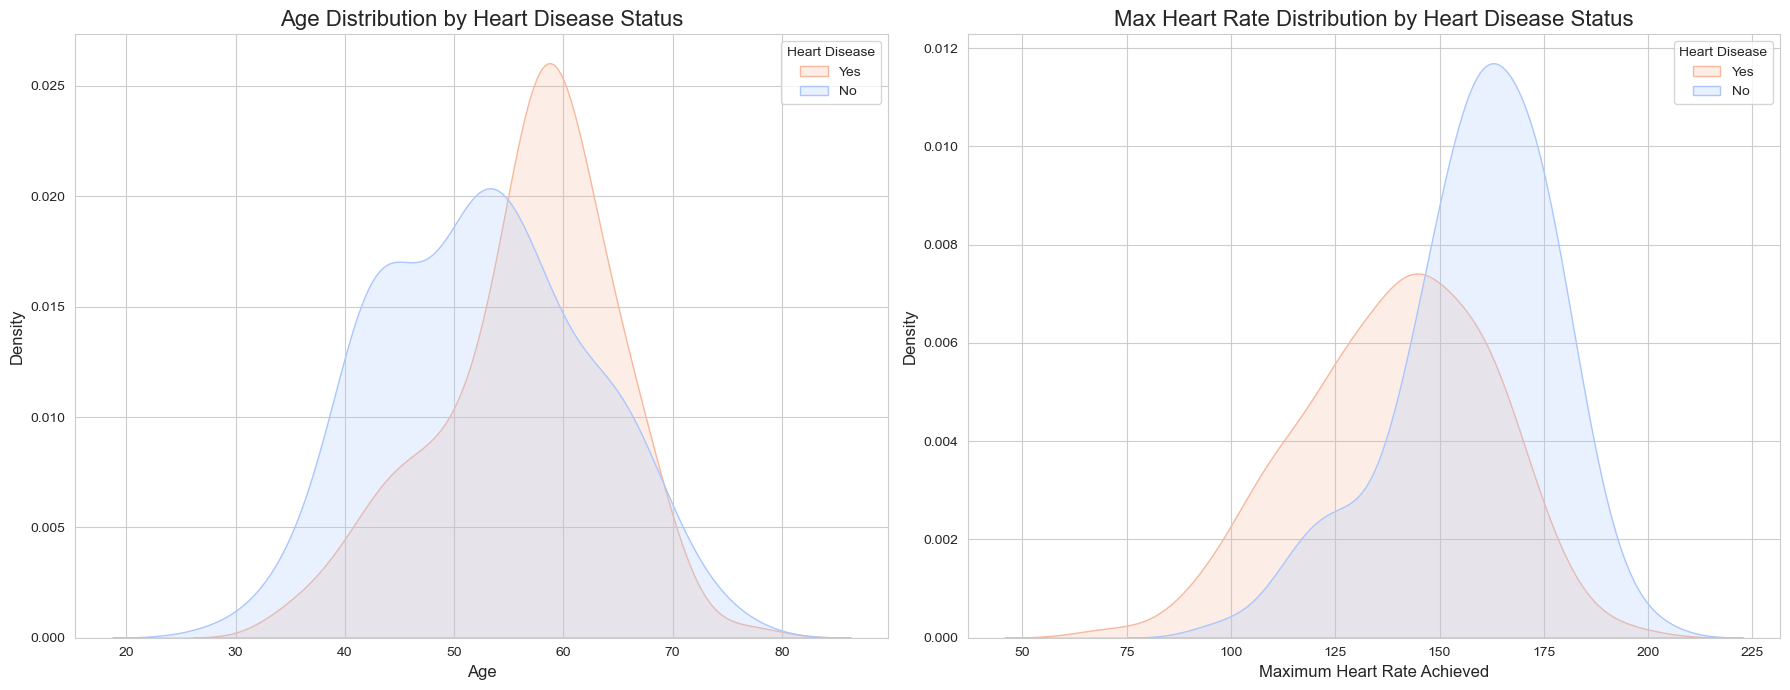

In [6]:
# --- Create a figure with two subplots side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- 1. Visualize Age Distribution vs. Target ---
sns.kdeplot(x='age', data=df, hue='target', fill=True, ax=axes[0], palette='coolwarm')
axes[0].set_title('Age Distribution by Heart Disease Status', fontsize=16)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend(title='Heart Disease', labels=['Yes', 'No'])


# --- 2. Visualize Max Heart Rate Distribution vs. Target ---
sns.kdeplot(x='thalach', data=df, hue='target', fill=True, ax=axes[1], palette='coolwarm')
axes[1].set_title('Max Heart Rate Distribution by Heart Disease Status', fontsize=16)
axes[1].set_xlabel('Maximum Heart Rate Achieved', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].legend(title='Heart Disease', labels=['Yes', 'No'])

# --- Display the plots ---
plt.tight_layout()
plt.savefig('../results/numerical_features_distribution.png')
plt.show()

## Step 5: Correlation Matrix Heatmap

The final step in our EDA is to create a correlation matrix to understand the linear relationships between all the variables. A **heatmap** is the best way to visualize this matrix, allowing us to quickly spot strong positive or negative correlations.

- **What to look for:**
    - **Strong correlation with `target`:** Features that have a high positive or high negative correlation with our target variable are often strong predictors.
    - **Strong correlation between features:** High correlation between two independent features can indicate multicollinearity, which is something to be aware of for some models.

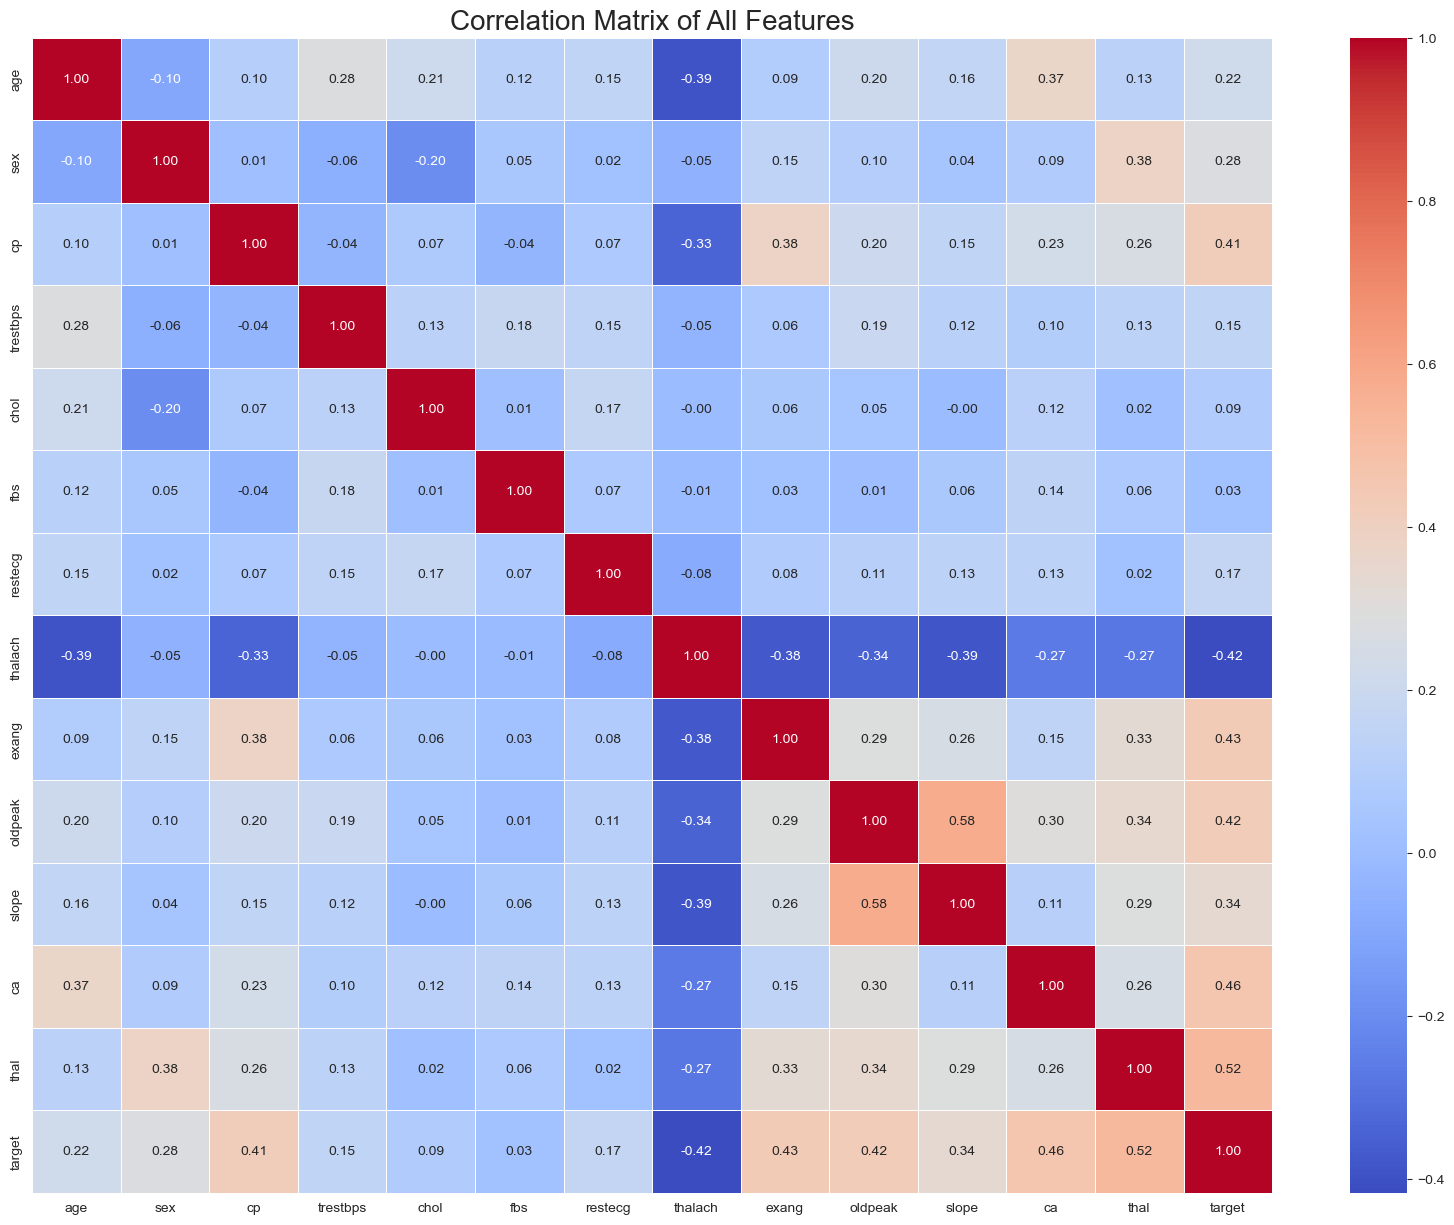

In [7]:
# --- 1. Calculate the correlation matrix ---
corr_matrix = df.corr()

# --- 2. Create the heatmap ---
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Features', fontsize=20)
plt.savefig('../results/correlation_heatmap.png')
plt.show()

## Step 6: One-Hot Encoding for Categorical Features

**Observation:** Several of our features like `cp` (Chest Pain Type), `thal`, and `slope` are categorical, even though they are represented by numbers. A machine learning model might mistakenly assume that there is an ordered relationship between these numbers (e.g., that `cp=4` is "greater" than `cp=1`).

**Strategy:** To prevent this and allow the model to treat each category independently, we will use **One-Hot Encoding**. This technique converts each category value into a new column and assigns a `1` or `0` to the column. We will use `pd.get_dummies()` for this, applying `drop_first=True` to avoid redundant columns (dummy variable trap).

In [8]:
# --- 1. Identify the categorical columns to be encoded ---
# Note: 'sex' and 'fbs' are already binary (0/1), so they don't need encoding,
# but including them is fine and ensures consistency.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# --- 2. Apply One-Hot Encoding ---
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# --- 3. Display the new DataFrame ---
print("--- DataFrame Shape After Encoding ---")
print(f"Original shape: {df.shape}")
print(f"New shape: {df_encoded.shape}")

print("\n--- First 5 Rows of the Encoded DataFrame ---")
df_encoded.head()

--- DataFrame Shape After Encoding ---
Original shape: (303, 14)
New shape: (303, 19)

--- First 5 Rows of the Encoded DataFrame ---


,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,0,True,False,False,False,True,False,True,False,False,True,True,False
1,67.0,160.0,286.0,108.0,1.5,3.0,1,True,False,False,True,False,False,True,True,True,False,False,False
2,67.0,120.0,229.0,129.0,2.6,2.0,1,True,False,False,True,False,False,True,True,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0.0,0,True,False,True,False,False,False,False,False,False,True,False,False
4,41.0,130.0,204.0,172.0,1.4,0.0,0,False,True,False,False,False,False,True,False,False,False,False,False


## Step 7: Feature Scaling

**Observation:** Our numerical features (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`) have very different scales. For instance, `chol` can be over 500, while `oldpeak` is typically less than 7.

**Strategy:** Many machine learning algorithms are sensitive to the scale of the input features. If one feature has a much larger scale than others, it might dominate the model's learning process. To prevent this, we will scale our numerical features. We will use **`StandardScaler`** from Scikit-learn, which standardizes features by removing the mean and scaling to unit variance.

In [9]:
# --- 1. Import StandardScaler ---
from sklearn.preprocessing import StandardScaler

# --- 2. Identify the numerical columns to scale ---
# We select only the original numerical columns, not the one-hot encoded ones.
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# --- 3. Apply Scaling ---
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


# --- 4. Display the scaled DataFrame ---
print("--- First 5 Rows of the Final Processed DataFrame ---")
df_encoded.head()

--- First 5 Rows of the Final Processed DataFrame ---


,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0.0,0,True,False,False,False,True,False,True,False,False,True,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,3.0,1,True,False,False,True,False,False,True,True,True,False,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,2.0,1,True,False,False,True,False,False,True,True,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.0,0,True,False,True,False,False,False,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0.0,0,False,True,False,False,False,False,True,False,False,False,False,False


## Step 8: Saving the Processed Data

**Objective:** Congratulations! Our dataset is now fully cleaned, encoded, and scaled. The final and most crucial step in this notebook is to save our processed DataFrame to a new CSV file. This file will serve as the clean starting point for all subsequent phases of our project, including PCA, feature selection, and modeling.

In [10]:
# --- 1. Define the output file path ---
OUTPUT_PATH = '../data/heart_disease_processed.csv'

# --- 2. Save the DataFrame to a CSV file ---
# We set index=False to prevent pandas from writing the DataFrame index as a column.
df_encoded.to_csv(OUTPUT_PATH, index=False)

# --- 3. Print a confirmation message ---
print(f"Processed data successfully saved to: {OUTPUT_PATH}")
print("\n--- Mission Accomplished for Notebook 01! ---")

Processed data successfully saved to: ../data/heart_disease_processed.csv

--- Mission Accomplished for Notebook 01! ---
